<a href="https://colab.research.google.com/github/charanjarpula21/CHARAN/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction using Machine learning

1.   Importing Libraries
2.   Reading the Data from CSV file
3.   Data Analysis
4.   Correlation Matrix
5.   Train-Test Split
6.   Algorithm Implementation
 *   1.Logistic Regression
 *   2.Decision Tree
 *   3.Random Forest Classifier
 *   4.Support Vector Machines(SVM)


7.   Final Model Implementation
8.   Conclusion








# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

# Reading the Data from CSV file

In this section, we will load and view the CSV file and its contents.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**# Filename**: heart.csv

We have 14 attributes/features including target which will be age, gender, cholesterol level, exacting, chest pain, old peak, thalach, FBS, slope, thal, etc.

In [5]:
dataframe=pd.read_csv("/content/drive/MyDrive/Heart Disease/heart.csv")
dataframe.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


# Data Analysis

Let, we get some basic information about the dataset.

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Now, let us look at whether the dataset has null values or not.

In [7]:
dataframe.isna().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


### **Inference**: From this output, our data does not contain null values and duplicates. So, the data is good which will be further analyzed.

# Correlation Matrix

Visulaizing the data features to find the correlation between them which will infer the important features.

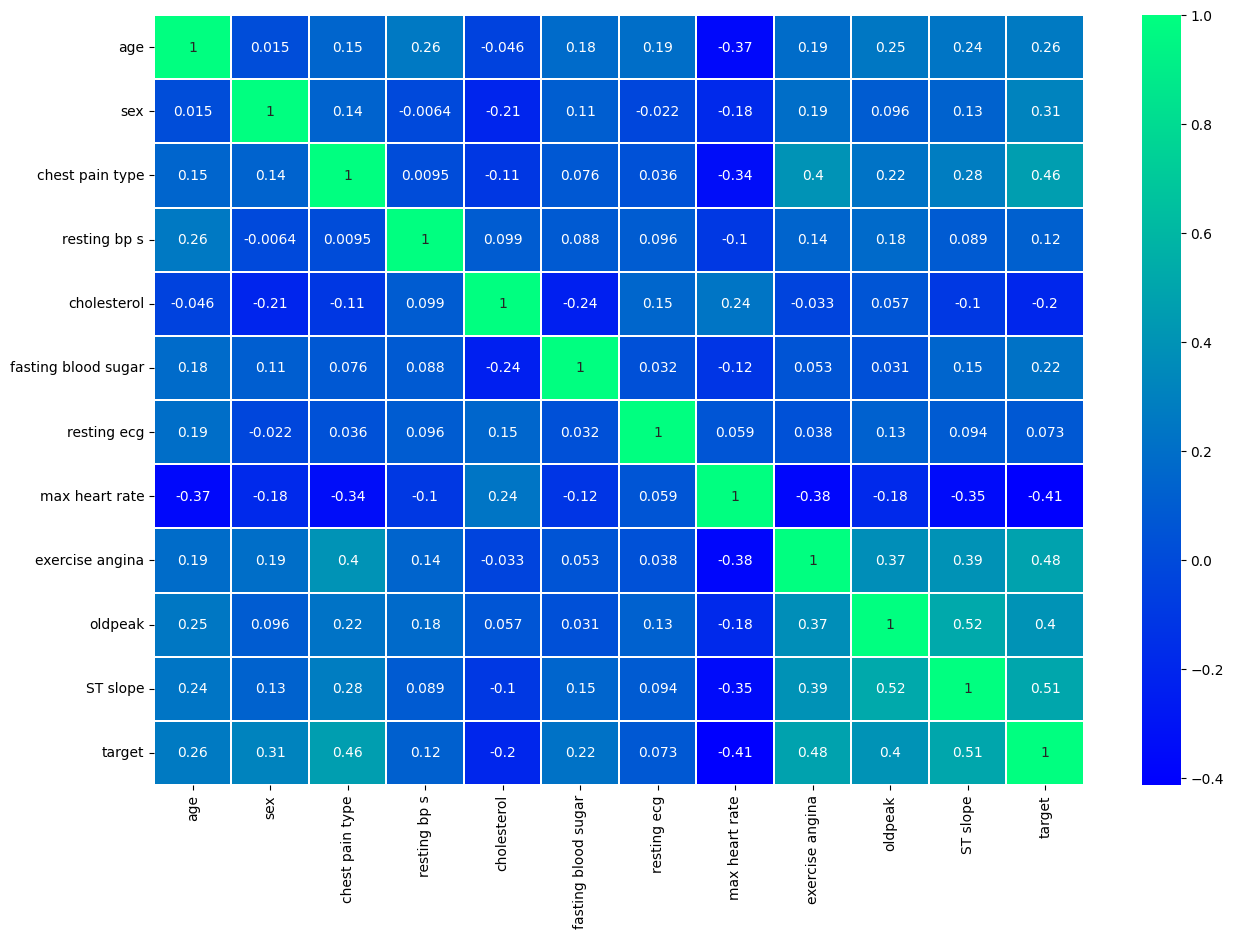

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

**Inference:**

From the above heatmap, we can understand that Chest pain(cp) and target have a positive correlation. It means that whose has a large risk of chest pain results in a greater chance to have heart disease. In addition to chest pain, thalach, slope, and resting have a positive correlation with the target.

Then, exercise-induced angina(exang) and the target have a negative correlation which means when we exercise, the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak, thal have a negative correlation with the target.

**Let us see the relation between each features distribution with the help of histogram.**

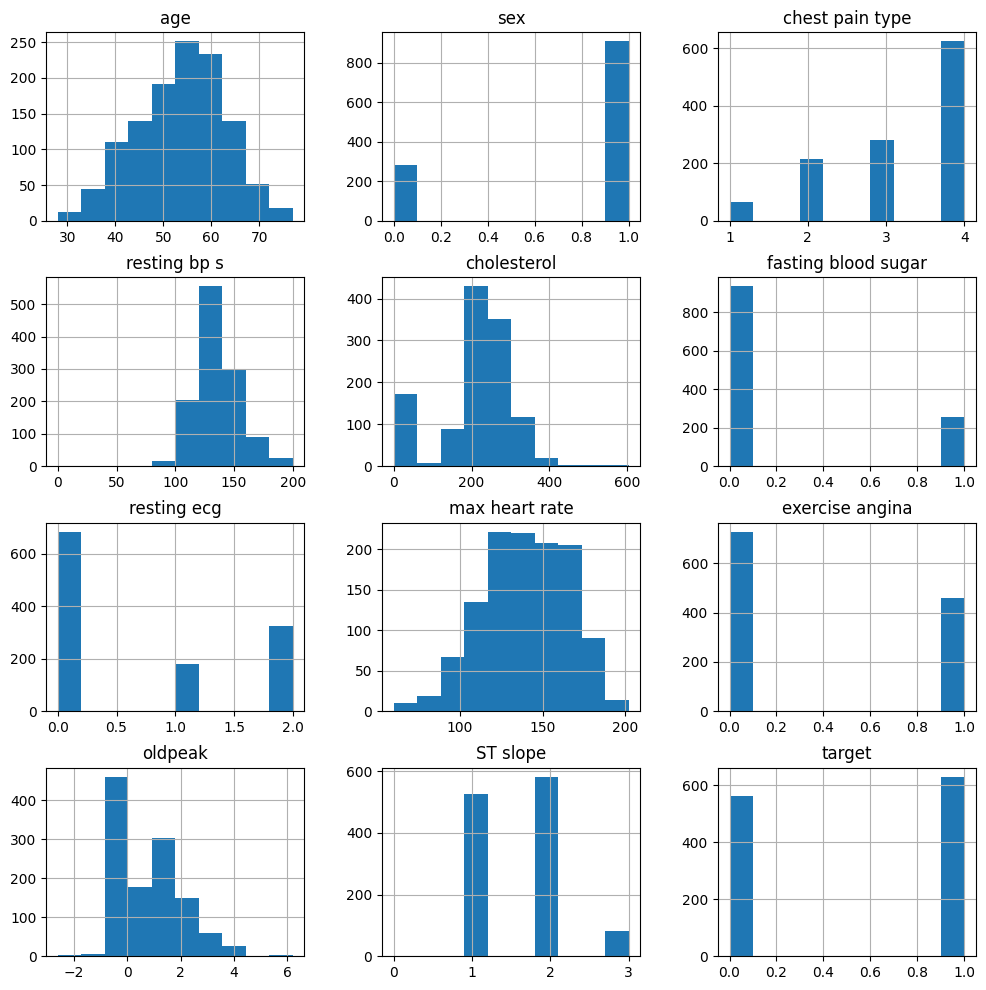

In [9]:
dataframe.hist(figsize=(12,12))
plt.savefig('featuresplot')

# Train-Test Split

X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [13]:
from sklearn.model_selection import train_test_split

X = dataframe.drop('target', axis=1)
y = dataframe['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

We split the whole dataset into trainset and testset which contains 75% train and 25% test.

We can include this train set into classifiers to train our model and the test set is useful for predicting the performance of the model by different classifiers.

# **Algorithm Implementation**

# 1 .Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Accuracy for Logistic Regression: 0.7986577181208053
Testing Sensitivity for Logistic Regression: 0.7841726618705036
Testing Specificity for Logistic Regression: 0.8113207547169812
Testing Precision for Logistic Regression: 0.7841726618705036


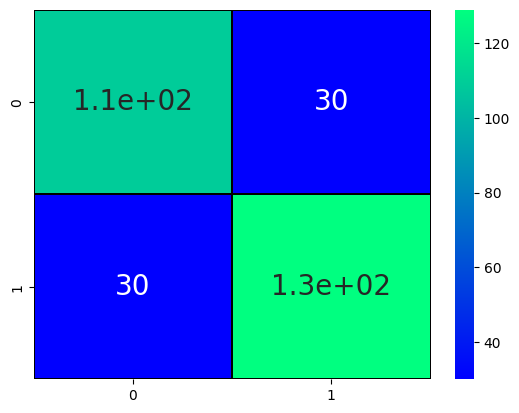

In [14]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       139
           1       0.81      0.81      0.81       159

    accuracy                           0.80       298
   macro avg       0.80      0.80      0.80       298
weighted avg       0.80      0.80      0.80       298



**Inference:** From the above report, we get the accuracy of the Logistic Regression classifier is about 80%.

# 2. Decision Tree

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       139
           1       0.83      0.91      0.87       159

    accuracy                           0.85       298
   macro avg       0.86      0.85      0.85       298
weighted avg       0.85      0.85      0.85       298

Testing Accuracy for Decision Tree: 0.8523489932885906
Testing Sensitivity for Decision Tree: 0.88
Testing Specificity for Decision Tree: 0.8323699421965318
Testing Precision for Decision Tree: 0.7913669064748201


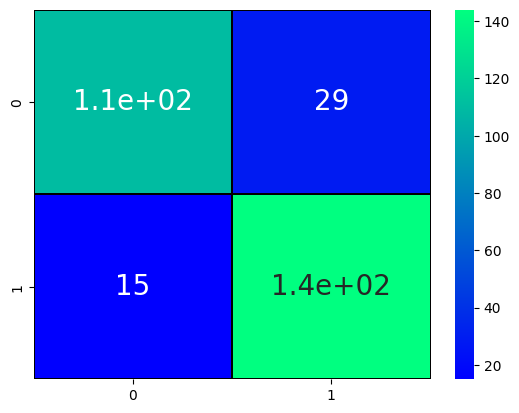

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

**Inference:** From the above report, we get the accuracy of the Decision Tree classifier is about 85%.

# 3. Random Forest Classifier

89.6
Testing Accuracy for Random Forest: 0.8959731543624161
Testing Sensitivity for Random Forest: 0.8970588235294118
Testing Specificity for Random Forest: 0.8950617283950617
Testing Precision for Random Forest: 0.8776978417266187


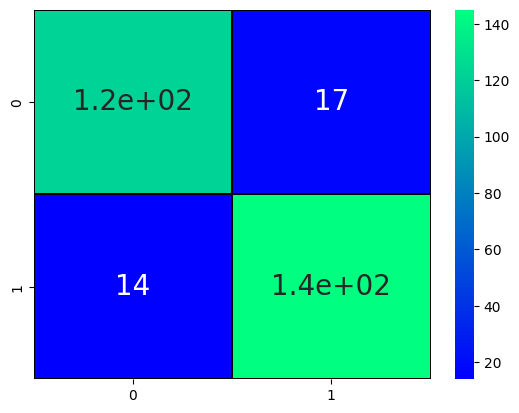

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

**Let us see the classification report for Random Forest Classifier:**

In [24]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       139
           1       0.90      0.91      0.90       159

    accuracy                           0.90       298
   macro avg       0.90      0.89      0.90       298
weighted avg       0.90      0.90      0.90       298



**Inference:** From the above report, we can get the accuracy of the Random Forest classifier is about 90%.

# 4. Support Vector Machines(SVM)

Testing Accuracy for SVM: 0.7953020134228188
Testing Sensitivity for Random Forest: 0.7954545454545454
Testing Specificity for Random Forest: 0.7951807228915663
Testing Precision for Random Forest: 0.7553956834532374


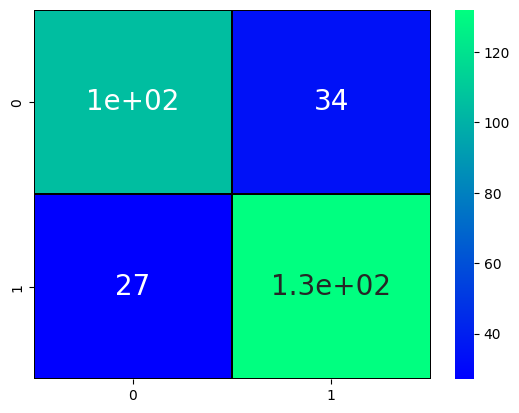

In [25]:
  from sklearn.svm import SVC
  svm=SVC(C=12,kernel='linear')
  model4=svm.fit(X_train,y_train)
  prediction4=model4.predict(X_test)
  cm4= confusion_matrix(y_test,prediction4)
  sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
  TP=cm4[0][0]
  TN=cm4[1][1]
  FN=cm4[1][0]
  FP=cm4[0][1]

  print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
  print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
  print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
  print('Testing Precision for Random Forest:',(TP/(TP+FP)))

**Let us see the classification report of SVM:**

In [26]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.80      0.76      0.77       139
           1       0.80      0.83      0.81       159

    accuracy                           0.80       298
   macro avg       0.80      0.79      0.79       298
weighted avg       0.80      0.80      0.79       298



**Inference:** From the above report, we get the accuracy of the Support Vector Machine classifier is about 80%.

From the results that we got, as four machine learning algorithms like Logistic Regression, Random Forest, Support Vector Machines and Decision Trees. From the final results, we got Logistic Regression as 80%, Random Forest as 90%, Support Vector Machines as 80%, and Decision Trees as 85%. We can conclude that the **Random Forest Classifier** is the best algorithm for our model with the highest accuracy around 90%

# Final Model Implementation

**CASE 1 – For Heart Disease**
*   **age**: 63
*   **sex**: 1
*   **chest pain type**: 2
*   **resting bp s**: 140
*   **cholesterol**: 289
*   **fasting blood sugar**: 0
*   **resting ecg**: 0
*   **max heart rate**: 172
*   **exercise angina**: 0
*   **oldpeak**: 0.0
*   **ST slope**: 1


In [42]:
input=(63, 1, 2, 140, 289, 0, 0, 172, 0, 0.0, 1)
input_as_numpy=np.asarray(input)
input_reshaped = input_as_numpy.reshape(1,-1)

pre_rf= rfc.predict(input_reshaped)

if(pre_rf[0] == 1):
  print("The patient seems to have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**CASE 2 – For Heart Disease**

*   **age**: 60
*   **sex**: 1
*   **chest pain type**: 4
*   **resting bp s**: 140
*   **cholesterol**: 250
*   **fasting blood sugar**: 0
*   **resting ecg**: 0
*   **max heart rate**: 120
*   **exercise angina**: 1
*   **oldpeak**: 2.0
*   **ST slope**: 2

In [43]:
input=(60, 1, 4, 140, 250, 0, 0, 120, 0, 2.0, 2)
input_as_numpy=np.asarray(input)
input_reshaped = input_as_numpy.reshape(1,-1)

pre_rf= rfc.predict(input_reshaped)

if(pre_rf[0] == 1):
  print("The patient seems to have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to have heart disease:(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Conclusion

Finally, we can conclude that real-time predictors will be essential in the healthcare sector nowadays. From this project, we will be able to predict real-time heart disease using the patient’s data from the model using the **Random Forest Classifier**, thereby making accurate heart disease prediction using machine learning.